In [3]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances, silhouette_score, calinski_harabasz_score, davies_bouldin_score



In [4]:
df = pd.read_csv('data/numerical_data.csv')
df.dropna(inplace=True)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,city,state_name_x,state_id,lat,lng,city_population,county_fips,county,county_population,...,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct,ruralurban_cc,rep_pct,dem_pct,crime_per_100,avg_propty_tax,state_name_y
0,0,New York,New York,NY,40.6943,-73.9249,8336817,36061,New York County,1653877,...,39.565360,1.784064,17.134644,0.000000,1,9.706266,86.556921,0.036231,11811.008190,NY
1,1,Los Angeles,California,CA,34.1139,-118.4068,3979576,6037,Los Angeles County,10105722,...,69.235895,5.681371,51.917013,0.605218,1,22.413336,71.757222,0.053825,6782.028673,CA
2,2,Long Beach,California,CA,33.7981,-118.1675,462628,6037,Los Angeles County,10105722,...,69.235895,5.681371,51.917013,0.605218,1,22.413336,71.757222,0.066151,6782.028673,CA
3,3,Santa Clarita,California,CA,34.4175,-118.4964,212979,6037,Los Angeles County,10105722,...,69.235895,5.681371,51.917013,0.605218,1,22.413336,71.757222,0.029470,6782.028673,CA
4,4,Glendale,California,CA,34.1818,-118.2468,199303,6037,Los Angeles County,10105722,...,69.235895,5.681371,51.917013,0.605218,1,22.413336,71.757222,0.035725,6782.028673,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,696,Battle Creek,Michigan,MI,42.2986,-85.2296,51093,26025,Calhoun County,134327,...,79.249181,8.712921,78.917095,30.977039,3,53.468473,41.012190,0.080781,4082.319040,MI
697,697,Florissant,Missouri,MO,38.7996,-90.3269,50952,29189,St. Louis County,999539,...,57.617910,4.973065,52.119318,1.137990,1,39.318414,55.686034,0.046894,4874.699159,MO
698,698,Joplin,Missouri,MO,37.0758,-94.5018,50925,29097,Jasper County,118522,...,77.943574,10.368353,77.136641,23.691697,3,72.569631,21.876423,0.143410,1990.127907,MO
699,699,Enid,Oklahoma,OK,36.4061,-97.8701,49688,40047,Garfield County,62421,...,78.643327,9.287302,76.710624,21.411357,5,73.740212,20.253339,0.075323,2540.766614,OK


In [5]:
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['float64', 'int']).columns
for col in numerical_columns:
    df[col] = scaler.fit_transform(df[[col]])

In [6]:
categorical_columns = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
scaler = MinMaxScaler()
# Encoding categorical columns
for col in categorical_columns:
    #df.drop(columns=[col], inplace=True)
    df[col] = le.fit_transform(df[col].astype(str))
    df[col]=df[col].astype(int)
df[categorical_columns] = scaler.fit_transform(df[categorical_columns])

In [7]:
df

,Unnamed: 0,city,state_name_x,state_id,lat,lng,city_population,county_fips,county,county_population,...,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct,ruralurban_cc,rep_pct,dem_pct,crime_per_100,avg_propty_tax,state_name_y
0,-1.729582,0.600605,0.644444,0.688889,0.694374,1.430421,20.205345,0.737994,0.589404,0.029174,...,-2.817347,-1.661909,-3.805089,-0.893651,-0.709868,-2.239646,2.310841,-0.964766,3.199328,0.695652
1,-1.724640,0.502269,0.066667,0.066667,-0.546820,-1.196774,9.428907,-1.022995,0.463576,3.669216,...,0.208583,-0.217681,-0.751264,-0.822129,-0.709868,-1.315782,1.284114,-0.366761,0.716833,0.086957
2,-1.719698,0.499244,0.066667,0.066667,-0.606386,-1.182641,0.730703,-1.022995,0.463576,3.669216,...,0.208583,-0.217681,-0.751264,-0.822129,-0.709868,-1.315782,1.284114,0.052211,0.716833,0.086957
3,-1.714757,0.810893,0.066667,0.066667,-0.489555,-1.202066,0.113265,-1.022995,0.463576,3.669216,...,0.208583,-0.217681,-0.751264,-0.822129,-0.709868,-1.315782,1.284114,-1.194589,0.716833,0.086957
4,-1.709815,0.334342,0.066667,0.066667,-0.534012,-1.187325,0.079441,-1.022995,0.463576,3.669216,...,0.208583,-0.217681,-0.751264,-0.822129,-0.709868,-1.315782,1.284114,-0.981988,0.716833,0.086957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,1.709815,0.052950,0.422222,0.422222,0.996976,0.762741,-0.287115,0.149355,0.125828,-0.625266,...,1.229782,0.905722,1.619292,2.767122,2.031825,0.942072,-0.848820,0.549462,-0.615846,0.434783
697,1.714757,0.293495,0.488889,0.466667,0.336996,0.461684,-0.287464,0.334932,0.827815,-0.252636,...,-0.976269,-0.480159,-0.733502,-0.759167,-0.709868,-0.086703,0.169177,-0.602355,-0.224697,0.478261
698,1.719698,0.423601,0.488889,0.466667,0.011853,0.215106,-0.287531,0.329536,0.387417,-0.632073,...,1.096630,1.519176,1.462972,1.906162,2.031825,2.330816,-2.176361,2.678236,-1.648631,0.478261
699,1.724640,0.267776,0.733333,0.733333,-0.114466,0.016167,-0.290590,0.971783,0.301325,-0.656235,...,1.167994,1.118570,1.425568,1.636678,4.773518,2.415923,-2.288963,0.363958,-1.376815,0.739130


In [8]:
df.columns = df.columns.astype(str)
pca = PCA(n_components=2)
df = pca.fit_transform(df)

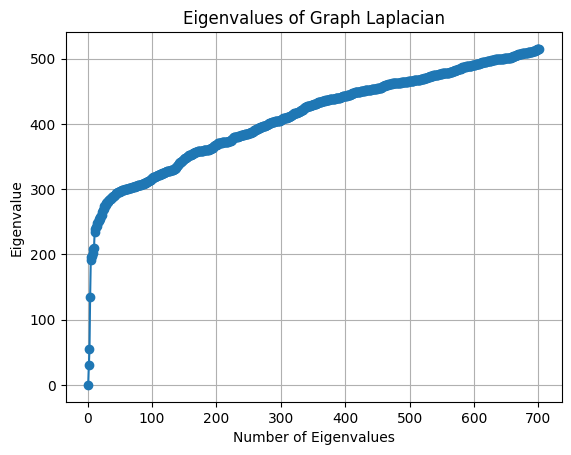

Optimal number of clusters: 3


In [9]:

# Compute pairwise distances
distances = pairwise_distances(df, metric='euclidean')

# Construct the affinity matrix
sigma = np.median(distances)  # Gaussian kernel bandwidth
affinity_matrix = np.exp(-distances ** 2 / (2. * sigma ** 2))

# Compute the graph Laplacian
D = np.diag(np.sum(affinity_matrix, axis=1))
L = D - affinity_matrix

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(L)

# Plot eigenvalues
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.xlabel('Number of Eigenvalues')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of Graph Laplacian')
plt.grid(True)
plt.show()

# Compute eigengap
eigengap = np.diff(eigenvalues)

# Find the optimal number of clusters
optimal_num_clusters = np.argmax(eigengap) + 1
print("Optimal number of clusters:", optimal_num_clusters)


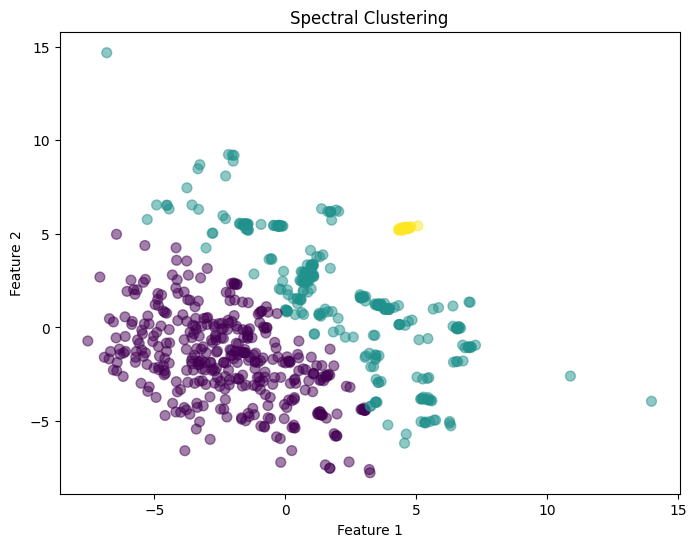

In [10]:
spectral_clustering = SpectralClustering(n_clusters=3, affinity='laplacian', random_state=42)
cluster_labels = spectral_clustering.fit_predict(df)
# Step 3: Visualization
plt.figure(figsize=(8, 6))
plt.scatter(df[:,0], df[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.title('Spectral Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [11]:
silhouette_avg = silhouette_score(df, cluster_labels)
print("Silhouette Score:", silhouette_avg)

calinski_harabasz = calinski_harabasz_score(df, cluster_labels)
print("Calinski-Harabasz Index:", calinski_harabasz)

davies_bouldin = davies_bouldin_score(df, cluster_labels)
print("Davies-Bouldin Index:", davies_bouldin)

Silhouette Score: 0.2995402856029479
Calinski-Harabasz Index: 239.689938703928
Davies-Bouldin Index: 1.1110437928306534
